In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


# Labeling Patients

In [2]:
# Part B
A = np.load('gene_data_train.npy')
b = np.load('diabetes_train.npy')

x = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T), b)
print(x)

[[-0.15646169]
 [ 0.09239418]
 [ 0.48053974]
 [-0.5847018 ]
 [-0.35350734]]


In [3]:
# Part C
A_test = np.load('gene_data_test.npy')
b_test = np.load('diabetes_test.npy')

prediction = np.dot(A_test,x)
prediction = np.sign(prediction)
print(prediction)

if all(prediction == b_test):
    print("All predictions correct")

[[ 1.]
 [-1.]
 [-1.]
 [ 1.]]
All predictions correct


# Image Analysis

#### Finding Coefficients for Best-Fits

In [4]:
points = [(.3,-.7),(.5,.91),(.9,-.99),(1,1.01),(1.2,-.93),(1.5,.8),(2,0)]

def populate_row(pair, circle=True):
    x, y = pair[0], pair[1]
    if circle:
        return np.array([(x*x) + (y*y),x,y])
    else:
        return np.array([x*x,x*y,y*y,x,y])

A_c, A_e, b = [], [], []
for i in range (len(points)):
    A_c.append(populate_row(points[i]))
    A_e.append(populate_row(points[i],False))
    b.append(1)
    
A_c, A_e, b = np.array(A_c), np.array(A_e), np.array(b)

x_c = np.dot(np.dot(np.linalg.inv(np.dot(A_c.T,A_c)),A_c.T), b)
x_e = np.dot(np.dot(np.linalg.inv(np.dot(A_e.T,A_e)),A_e.T), b)

print("Coefficients of the best-fit circle: ",x_c)
print("Coefficients of the best-fit ellipse: ",x_e)

Coefficients of the best-fit circle:  [ 2.39722071 -3.98007129 -0.11237247]
Coefficients of the best-fit ellipse:  [ 2.95103059  0.4670502   3.66108715 -5.41586506 -0.55339042]


#### Errors and Plots

In [5]:
e_c = np.linalg.norm(np.dot(A_c,x_c) - b)
e_e = np.linalg.norm(np.dot(A_e,x_e) - b)
print("Circle's |e|/N = ",e_c/len(points))
print("Ellipse's |e|/N = ",e_e/len(points))

Circle's |e|/N =  0.163684495416
Ellipse's |e|/N =  0.0680943899065


# GPS Locationing

In [6]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    G2_out = np.roll(MLS2,delay[satellite_ID - 1])
    
    CA_code = G1_out * G2_out
    
    return CA_code

[array([-1023., -1022., -1021., ...,  1020.,  1021.,  1022.])
 array([-1., -2., -1., ..., -1., -2., -1.])]


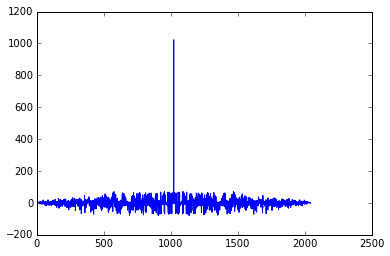

In [10]:
## PART A CODE HERE
def array_correlation(array1,array2):
    """ This function should return two array or a matrix with one row corresponding to 
    the offset and other to the correlation value
    """
    ## INSERT YOUR CODE HERE
    ## Use np.correlate with "FULL". Check out the helper page for it 
    
    offset = np.array([float(i - len(array1)) for i in range(len(array1)*2)])
    cVal = np.correlate(array1,array2, "full")
    return np.array([offset, cVal])

auto10 = array_correlation(Gold_code_satellite(10), Gold_code_satellite(10))
print(auto10)
plt.plot(auto10[1])

We can see that the Auto-Correlation is very high

[array([-1023., -1022., -1021., ...,  1020.,  1021.,  1022.])
 array([-1., -2., -1., ..., -3., -2., -1.])]


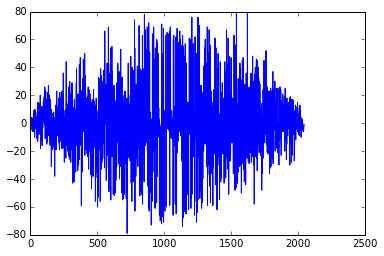

In [13]:
## PART B CODE HERE
cross1013 = array_correlation(Gold_code_satellite(10),Gold_code_satellite(13))
print(cross1013)
plt.plot(cross1013[1])

We see that the cross-correlation between different odes is very low

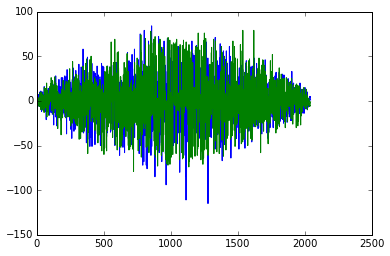

In [24]:
## PART C CODE HERE
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2,size = length_of_noise)
    noise_array = 2*noise_array - np.ones(size(noise_array))
    return noise_array

random = integernoise_generator(1023)
cross10random = array_correlation(Gold_code_satellite(10),random)

plt.plot(list(zip(cross10random[1], cross1013[1])))

Like the cross0-correlation between code 10 and code 13, this cross-correlation is also very low.

Also, it means that we can uniquely identify each satellite, because cross correlate a satellite with anything except itself you get nothing.

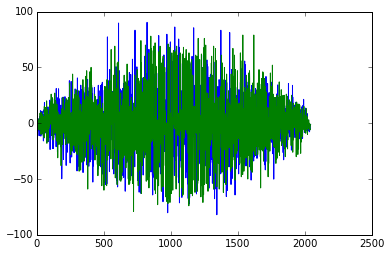

In [27]:
## PART D CODE HERE
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0,1,length_of_noise)
    return noise_array

rand = gaussiannoise_generator(1023)
cross = array_correlation(Gold_code_satellite(10), rand)
plt.plot(list(zip(cross[1], cross1013[1])))

Again, we're goooood

The satellites present in data1 are:  [4, 7, 13, 19]


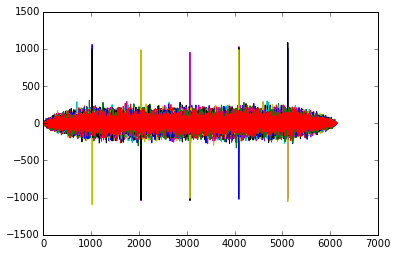

In [42]:
## PART E CODE HERE
## USE 'LOAD' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY

data1 = np.load("data1.npy")

satellites = []
for i in range(24):
    cross = array_correlation( data1, Gold_code_satellite(i))[1]
    if np.max(cross) > 800:
        satellites.append(i)
    plt.plot(cross)
    
print("The satellites present in data1 are: ",satellites)

The sat present in data2 is satellite  3


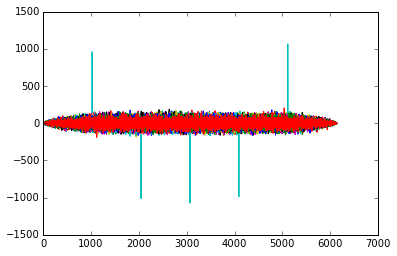

In [43]:
## PART F CODE HERE
## USE DATA2.NPY AS THE SIGNAL ARRAY

data2 = np.load("data2.npy")
satellites = []
for i in range(24):
    cross = array_correlation( data2, Gold_code_satellite(i))[1]
    if np.max(cross) > 800:
        satellites.append(i)
    plt.plot(cross)
    
print("The sat present in data2 is satellite ",satellites[0])

We can see that the sequence is 1,-1,-1,-1,1

The satellites present in data1 are:  [5, 20]


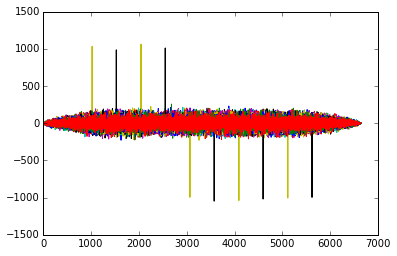

In [44]:
## PART G CODE HERE
## USE DATA3.NPY AS THE SIGNAL ARRAY

data3 = np.load("data3.npy")
satellites = []
for i in range(24):
    cross = array_correlation(data3, Gold_code_satellite(i))[1]
    if np.max(cross) > 800:
        satellites.append(i)
    plt.plot(cross)
    
print("The satellites present in data1 are: ",satellites)

From the plot, we can roughly see that the delay is around 1000ms for one satellite and 1500ms for the other.